CS 418 Final Project
---
Using dataset scraped from Zillow
Includes all houses for sale in Chicago

data.csv is broken down into these columns...

| Address | Zip Code | Value | SQFT | Price Per SQFT | Number of Bedrooms | Number of Bathrooms | Number of Full Bathrooms | Year Built | Heating | Cooling | Parking | Type | Has Garage | Number of Storeis | HOA FEE |
|---------|----------|-------|------|----------------|--------------------|---------------------|--------------------------|------------|---------|---------|---------|------|------------|-------------------|---------|

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import math
import operator
%matplotlib inline

dfhouses = pd.read_csv('data.csv')

dfhouses.head()

                        Address  Zip Code     Value    SQFT  Price Per SQFT  \
0  4800 S Lake Park Ave APT 607     60615   35000.0  1175.0            30.0   
1           232 N La Crosse Ave     60644  239900.0  2300.0           104.0   
2            12043 S Wallace St     60628    7000.0  1970.0             4.0   
3           1511 S Kolin Ave #2     60623   55900.0     NaN             NaN   
4   4938 S Drexel Blvd APT 114R     60615  209000.0  1218.0           172.0   

   Number of Bedrooms  Number of Bathrooms  Number of Full Bathrooms  \
0                 2.0                  1.0                       1.0   
1                 5.0                  3.0                       3.0   
2                 7.0                  3.0                       3.0   
3                 3.0                  2.0                       2.0   
4                 2.0                  2.0                       1.0   

   Year Built          Heating  Cooling                     Parking  \
0      1970.0  Forced

Best Zip Code for Price Per SQFT
---
Compares all the Price Per SQFT for each zip code

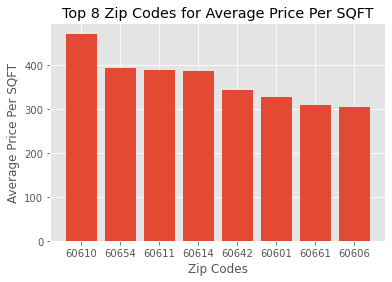

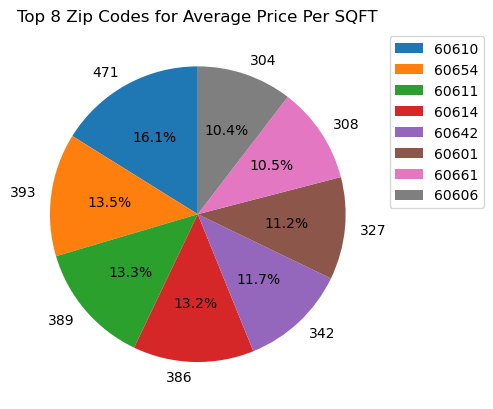

In [57]:
# Grab the zip code and price per sqft columns
df_zip_price_per_sqft = dfhouses.loc[:, ['Zip Code','Price Per SQFT']]

# Sort by ASC for price per sqft
df_zip_price_per_sqft = df_zip_price_per_sqft.sort_values(by = 'Price Per SQFT')

# Make a dictionary for each zip code and add to the total price per sqft
zip_dict = {}
zip_dict_count = {}

for i, row in df_zip_price_per_sqft.iterrows():
    (zip_code, price_per_sqft) = row
    if math.isnan(price_per_sqft):
        continue;
        
    
    # See if zip_code is in dictionary, add its price_per_sqft
    # Check for nans
    if zip_code in zip_dict:
        zip_dict[zip_code] += price_per_sqft
        zip_dict_count[zip_code] += 1
    else:
        zip_dict[zip_code] = price_per_sqft
        zip_dict_count[zip_code] = 1

# Make a new dictionary with the average values of Price Per SQFT
zip_dict_avg = {}

for key, val in zip_dict.items():
    zip_dict_avg[key] = int(val / zip_dict_count[key])
        
# Sort the dictionary
zip_dict_avg = dict(sorted(zip_dict_avg.items(), key=operator.itemgetter(1), reverse=True))
x_vals = np.array(list(zip_dict_avg.keys()), dtype="int")[:8]
y_vals = np.array(list(zip_dict_avg.values()), dtype="int")[:8]

# Plot the bar graph for the top 8
style.use('ggplot')
plt.bar(np.arange(len(x_vals)), y_vals, align='center')
plt.xticks(np.arange(len(x_vals)), x_vals)
plt.xlabel('Zip Codes')
plt.ylabel('Average Price Per SQFT')
plt.title('Top 8 Zip Codes for Average Price Per SQFT')

# Plot the pie graph for the top 8
style.use('default')
fig1, ax1 = plt.subplots()
pie = ax1.pie(y_vals, labels=y_vals, autopct='%1.1f%%', shadow=False, startangle=90)
plt.legend(pie[0], x_vals, bbox_to_anchor = (1,1))
plt.title('Top 8 Zip Codes for Average Price Per SQFT')
plt.show()

## Best Zip Code for Rooms

Finds which zip code is more likely to have more rooms

In [3]:
zip_code_average = dfhouses.groupby('Zip Code')['Number of Bedrooms'].mean()

zip_code_average = zip_code_average.sort_values(ascending = False)

zip_code_average

Zip Code
60621    5.428571
60609    5.400000
60620    5.090909
60644    5.000000
60619    4.642857
60629    4.571429
60636    4.571429
60617    4.533333
60624    4.500000
60639    4.125000
60630    4.125000
60651    4.117647
60623    4.090909
60628    4.000000
60632    4.000000
60634    4.000000
43116    4.000000
60653    3.888889
60641    3.857143
60608    3.833333
60643    3.739130
60637    3.700000
60618    3.700000
60707    3.666667
60638    3.647059
60649    3.571429
60655    3.562500
60631    3.555556
60659    3.400000
60625    3.333333
60645    3.333333
60646    3.250000
60647    3.225000
60612    3.058824
60622    3.030303
43147    3.000000
60656    3.000000
60626    3.000000
60652    3.000000
60616    2.933333
60615    2.760000
60610    2.720000
60657    2.702703
60614    2.676923
60640    2.565217
60633    2.500000
60642    2.500000
60613    2.421053
60606    2.333333
60654    2.285714
60605    2.272727
60611    2.210526
60607    2.153846
60660    2.000000
60603    2.000000
6

## Highest and Lowest Valued Properties

Finds the highest valued property in the Chicago and the lowest valued property in Chicago

In [4]:
most_expensive_house = dfhouses.groupby('Zip Code')['Value'].max().sort_values(ascending=False)
cheapest_house = dfhouses.groupby('Zip Code')['Value'].min().sort_values(ascending=True)

print(most_expensive_house.head(1))
print(cheapest_house.head(1))

Zip Code
60610    18750000.0
Name: Value, dtype: float64
Zip Code
60628    7000.0
Name: Value, dtype: float64


## Average Price of Properties by Zip Code

These prices are not a representation of the average income of the zip code but an average value of the properties for sale at the zip code. One can only make assumptions of the income based on the average property value; however, one can say that zip code 60610 is currently the most expensive to buy in and 60633 is the cheapest.

In [5]:
# prevents pandas from displaying floats in scientific notation
pd.options.display.float_format = '{:.2f}'.format

average_price_by_zip = dfhouses.groupby('Zip Code')['Value'].mean().sort_values(ascending=False)

print(average_price_by_zip)

Zip Code
60610   2737904.00
60611   1663451.95
60654   1111314.29
60614   1004561.52
60609    796227.10
60622    557130.30
60608    508316.67
60631    486725.22
60618    486237.75
60606    484333.33
60642    450400.00
60647    448269.83
60657    435524.32
60625    430600.00
43116    427732.00
60605    414426.36
60646    401475.00
60616    390419.93
43147    384990.00
60643    380447.74
60645    379388.89
60630    373687.50
60659    366960.00
60653    366294.33
60607    364239.92
60661    337760.00
60641    336657.07
60656    333087.50
60707    332333.67
60634    332235.71
60613    317710.53
60601    306350.00
60640    305019.78
60632    300850.08
60612    299123.53
60638    293423.53
60619    293178.50
60603    289950.00
60639    283262.50
60626    282018.69
60655    266506.25
60652    266466.67
60615    266403.92
60629    266271.43
60637    236299.90
60602    221950.00
60660    220081.82
60644    216271.43
60651    207782.29
60620    202136.36
60624    197480.00
60649    194542.86
606

## Perfoming a Comparable Market Analysis (CMA) on Each Zip Code

Doing a CMA on each zip code can help us analyze whether you're over paying for a property or buying something at a steal.

In [7]:
cma_results = dfhouses[['Address','Zip Code','Value','SQFT','Price Per SQFT']]

# first we start by calculating average price per SQFT of each zipcode
average_ppsqft = cma_results.groupby('Zip Code')['Price Per SQFT'].mean()

# after calculating the average price per SQFT for each zip, then we can approximate how much a
# property should be based on this average
approximate_values = []

# multiplies each property's SQFT by the average ppsqft of its zip code to get
# the approximate value/price
for index, row in cma_results.iterrows():
    approximated_value = row['SQFT'] * average_ppsqft[row['Zip Code']]
    approximate_values.append(approximated_value)

# adds the results to the dataframe
cma_results.insert(len(cma_results.columns), "Approximate Value", approximate_values) 

# after finding the approximate value of each property, we can assess whether you are
# over-paying or under-paying for a property. A negative price signifies under-paying a
# plus sign signifies over-paying
overunder_values = []

# calculating the over under value is simple... we are just taking the difference between 
# the listed value and the approximated value
for index, row in cma_results.iterrows():
    overunder = row['Value'] - row['Approximate Value']
    overunder_values.append(overunder)

cma_results.insert(len(cma_results.columns), "Over/Under Value", overunder_values)

cma_results

,Address,Zip Code,Value,SQFT,Price Per SQFT,Approximate Value,Over/Under Value
0,4800 S Lake Park Ave APT 607,60615,35000.00,1175.00,30.00,168025.00,-133025.00
1,232 N La Crosse Ave,60644,239900.00,2300.00,104.00,219880.00,20020.00
2,12043 S Wallace St,60628,7000.00,1970.00,4.00,164354.29,-157354.29
3,1511 S Kolin Ave #2,60623,55900.00,nan,nan,nan,nan
4,4938 S Drexel Blvd APT 114R,60615,209000.00,1218.00,172.00,174174.00,34826.00
...,...,...,...,...,...,...,...
792,4816 N Nordica Ave,60656,389000.00,1265.00,308.00,268654.38,120345.62
793,919 W Wolfram St,60657,899000.00,3934.00,229.00,1028156.22,-129156.22
794,444 W Fullerton Pkwy APT 1503,60614,330000.00,1175.00,281.00,455022.67,-125022.67
795,10235 S Whipple St,60655,235000.00,1027.00,229.00,178954.75,56045.25
